**Nom**: Marie-Anne Randrianarivony


## 3.1. Reproduction des étapes 2-4 de la méthodologie de conduite de projet ML du chapitre 2

## 2. Récupération des données 

In [324]:
#Chargement des libraries et des données
import pandas as pd
import numpy as  np
customer=pd.read_csv("Customer.csv")
country_gdp=pd.read_csv("CountryGDP.csv")
country_population=pd.read_csv("CountryPopulation.csv")

#### 2.1. Structure des données 

In [325]:
customer.head()

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
0,41.0,6.0,28.0,Fem,False,4.0,China,113
1,34.0,4.0,15.5,Fem,True,2.0,China,36
2,38.0,5.0,?,Fem,False,7.0,China,111
3,20.0,1.0,44.0,Fem,False,2.0,China,71
4,39.0,10.0,10.0,Fem,True,4.0,China,80


On observe que certains valeurs sont représentés par un ? dans la colonne `first_item_prize` et certaines valeurs sont représentés par "unknown" dans la colonne `revenue`. 

In [326]:
customer.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   pages             10000 non-null  float64
 2   first_item_prize  10000 non-null  str    
 3   gender            10000 non-null  str    
 4   ReBuy             10000 non-null  bool   
 5   News_click        10000 non-null  float64
 6   country           10000 non-null  str    
 7   revenue           10000 non-null  str    
dtypes: bool(1), float64(3), str(4)
memory usage: 556.8 KB


In [327]:
#Nombre total de valeurs inconnues dans la colonne first_item_prize
unknown_value_FIP=customer['first_item_prize'].isin(['?',''])
unknown_value_FIP.sum()

np.int64(3)

In [328]:
#Nombre total de valeurs inconnues dans la colonne revenue
unknown_value_revenue=customer['revenue'].isin(['unknown'])
unknown_value_revenue.sum()

np.int64(4)

### Conversion des variables `first_item_prize`,`revenue`, en numérique

In [329]:
#En remplacant les valeurs inconnues "?" et "unknown" par NaN
customer['first_item_prize']=pd.to_numeric(customer['first_item_prize'],errors='coerce')
customer['revenue']=pd.to_numeric(customer['revenue'], errors='coerce')

In [330]:
customer.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   pages             10000 non-null  float64
 2   first_item_prize  9997 non-null   float64
 3   gender            10000 non-null  str    
 4   ReBuy             10000 non-null  bool   
 5   News_click        10000 non-null  float64
 6   country           10000 non-null  str    
 7   revenue           9996 non-null   float64
dtypes: bool(1), float64(5), str(2)
memory usage: 556.8 KB


Il y a 10 000 observations. Les colonnes `first_item_prize` et `revenue` sont de type string au lieu de type numérique. La colonne `first_iten_prize` contient 3 valeurs manquantes de type "?". La colonne `revenue` contient 4 valeurs manquantes de type  "unknown". On a principalement 5 variables numériques dont `age`, `pages`, `first_item_prize`,  `News_click`,`revenue`.

In [331]:
customer.describe()

,age,pages,first_item_prize,News_click,revenue
count,10000.000000,10000.000000,9997.000000,10000.000000,9996.000000
mean,37.431400,5.995000,40.431730,4.412000,122.812625
std,9.490474,2.438559,27.556289,2.418231,86.750910
min,18.000000,1.000000,10.000000,0.000000,1.000000
25%,31.000000,5.000000,22.000000,3.000000,59.000000
50%,37.000000,6.000000,42.000000,4.000000,100.000000
75%,43.000000,7.000000,44.000000,6.000000,164.000000
max,79.000000,14.000000,117.000000,10.000000,995.000000


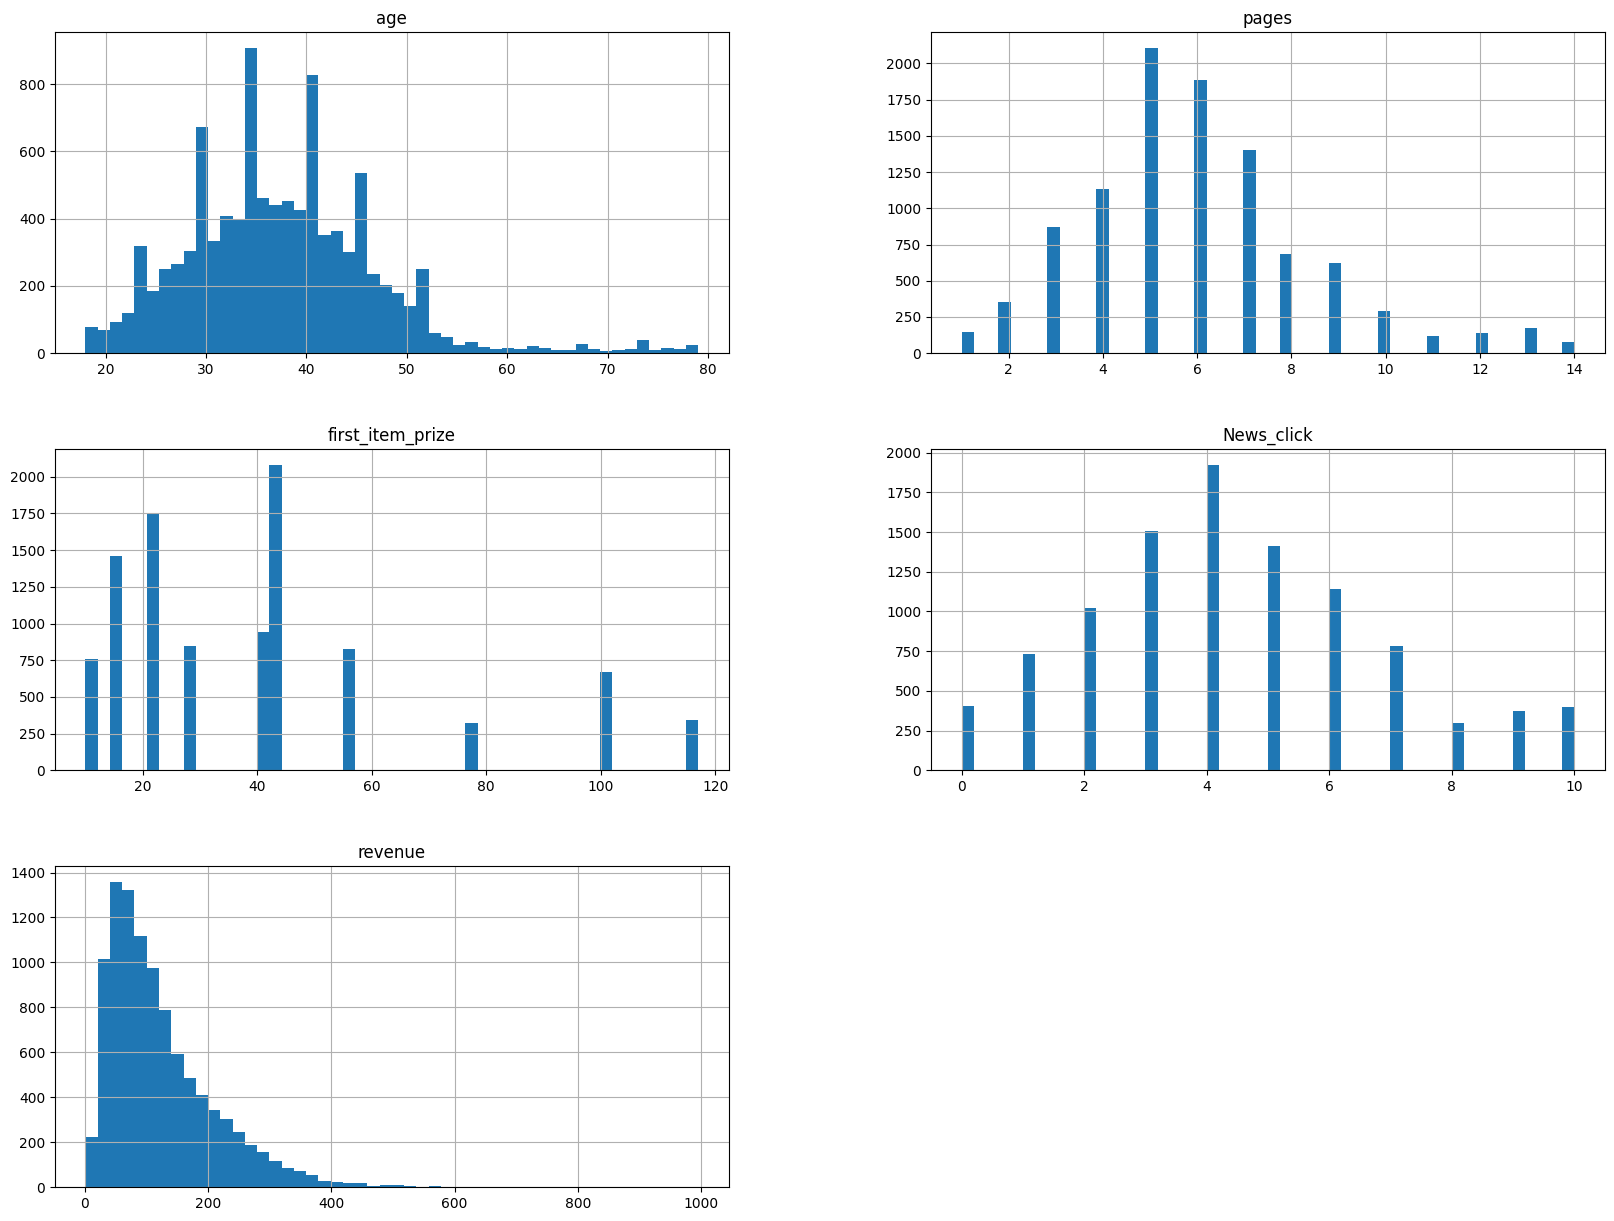

In [332]:
#Histogrammes des valeurs numériques 
%matplotlib inline 
import matplotlib.pyplot as plt
customer.hist(bins=50, figsize=(20,15))
plt.show()

* Plus de 800 clients visitant le site se trouvent dans leur trentaine .
* On observe quelques valeurs extrêmes pour la variable `age`.
* Plus de 2000 clients ont visité 5 pages du site.
* La plupart des clients ont acheté leurs premiers articles aux alentours  de 40 dollars.
* Une grande partie des clients ont cliqués 4 fois sur une compagne de publicité du site.
* L'histogramme représentant les revenus est légèrement dissymétrique.Cela peut suggéré la présence de valeurs extrêmes ou aberrantes.
* Plus de 1400 clients génèrent des revenus se situant entre 50 et 100 dollars.


#### 2.2. Création du jeu de test

In [333]:
from sklearn.model_selection import train_test_split
train_set, test_set =train_test_split(customer,test_size=0.2,
                                      random_state=42)

In [334]:
train_set.head(5)

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
9254,36.0,6.0,10.0,Masc,False,3.0,Ghana,14.0
1561,36.0,6.0,22.0,Masc,True,4.0,Bangladesh,66.0
1670,38.0,3.0,44.0,Fem,False,3.0,Russia,74.0
6087,36.0,4.0,15.5,Masc,False,10.0,Argentina,116.0
6669,40.0,4.0,15.5,Fem,False,7.0,Sudan,36.0


In [335]:
test_set.head()

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
6252,54.0,3.0,15.5,Masc,False,3.0,Algeria,39.0
4684,37.0,5.0,102.0,Fem,True,5.0,South Africa,183.0
1731,43.0,7.0,28.0,Masc,True,3.0,Russia,72.0
4742,33.0,5.0,28.0,Fem,True,4.0,South Africa,90.0
4521,40.0,5.0,57.0,Masc,False,2.0,Burma,85.0


## 3. Découverte et visualisation des données pour mieux comprendre

In [336]:
#Copie du jeu d'entraînement pour éviter de détériorer l'original
customer=train_set.copy()

#### 3.1 Visualisation des données

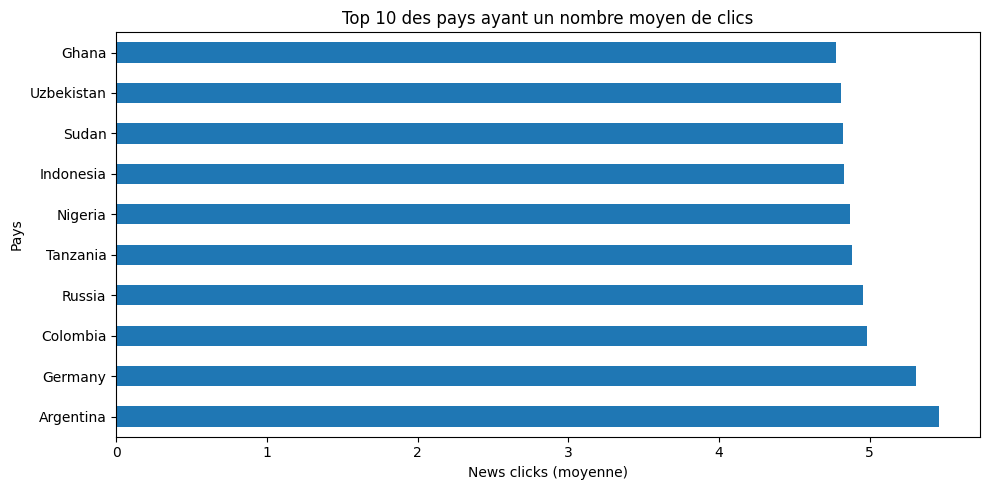

In [337]:
import matplotlib.pyplot as plt
#Top 10 des pays ayant le nombre de clic moyen qu'un client a effectué sur une compagne de publicité du site
mean_news_click=customer.groupby('country')['News_click'].mean().sort_values(ascending=False)
top_10_country=mean_news_click.head(10)
top_10_country.plot(kind='barh',figsize=(10,5))
plt.title("Top 10 des pays ayant un nombre moyen de clics")
plt.xlabel("News clicks (moyenne)")
plt.ylabel("Pays")
plt.tight_layout()
plt.show()


* Les moyennes du nombre de clics effectués par un client sur une campagne publicitaire du site sont approximativement très proche entre les 10 pays (Aux alentours de 5 clics).
* L'Argentine et l'Allemagne se démarquent légèrement avec une moyenne supérieure à 5.


#### 3.2. Recherche des corrélations

In [338]:
corr_matrix=customer.corr(numeric_only=True)

In [339]:
corr_matrix['revenue'].sort_values(ascending=False)

revenue             1.000000
News_click          0.374412
first_item_prize    0.367441
ReBuy               0.118381
age                 0.022159
pages              -0.010377
Name: revenue, dtype: float64

On observe que les revenues générés par les clients ont tendance à augmente lorsque le nombre de clics effectué sur une campagne publicitaire augmente, de même lorsque le prix du premier article acheté par les clients augmente.

#### 3.3. Expérimenter avec des combinaisons de variables

In [340]:
customer["news_click_per_pages"]=customer["News_click"] /customer["pages"]
customer["first_item_prize_per_age"]=customer["first_item_prize"] / customer["age"]

In [341]:
corr_matrix=customer.corr(numeric_only=True)
corr_matrix["revenue"].sort_values(ascending=False)

revenue                     1.000000
News_click                  0.374412
first_item_prize            0.367441
first_item_prize_per_age    0.334396
news_click_per_pages        0.221803
ReBuy                       0.118381
age                         0.022159
pages                      -0.010377
Name: revenue, dtype: float64

* La nouvelle variable `first_item_prize_per_age` est beaucoup plus corrélée avec la variable `revenue` que la variable `age` seule.
*  On observe également que la variable `news_click_per_pages` est plus corrélée avec la variable revenu que la variable `pages` seule.

## 4. Préparation des données pour les algorithmes de ML

In [342]:
#Séparation des prédicteurs et des étiquettes
customer=train_set.drop("revenue", axis=1)
customer_labels=train_set["revenue"].copy()

#### 4.1. Nettoyage des données

La variable `first_item_prize` et la variable `revenue` contiennent quelques valeurs manquantes. Pour y remédier, nous allons **mettre en valeur** ses valeurs en utilisant la médiane.

In [343]:
#Remplacement des valeurs manquantes de chaque variable par la valeur médiane de cette variable
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [344]:
#Récupération des variables numériques
customer_num=customer.drop(["gender", "ReBuy", "country"],axis=1)

In [345]:
#Estimation des paramètres
imputer.fit(customer_num)

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


In [346]:
imputer.statistics_

array([37.,  6., 42.,  4.])

In [347]:
customer_num.median().values

array([37.,  6., 42.,  4.])

In [352]:
#Transformation du jeu d'entraînement 
X=imputer.transform(customer_num)

#### 4.2. Gestion des variables qualitatives

Les variables qualitatives sont principalement: `ReBuy`, `gender`, `country` 

In [353]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
customer_cat=customer[["ReBuy","gender","country"]]
customer_cat_1hot=encoder.fit_transform(customer_cat)

In [354]:
customer_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 24000 stored elements and shape (8000, 54)>

In [355]:
customer_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(8000, 54))

#### 4.3. Transformateur sur mesure

In [356]:
#Transformateur qui ajoute les variables combinées
news_click_ix, first_item_prize_ix, pages_ix, age_ix =[
    list(customer_num.columns).index(col)
    for col in ("News_click","first_item_prize",
                "pages","age")]               

In [357]:
#Fonction qui jouera le rôle de transformateur
import numpy as np
def add_extra_features(X,add_news_click_per_pages=True):
    prix_par_age= X[:, first_item_prize_ix] / X[:, age_ix]
    if add_news_click_per_pages:
        news_click_per_pages= X[:, news_click_ix] / X[:, pages_ix]
        return np.c_[X, prix_par_age, news_click_per_pages]
    else:
        return np.c_[X, prix_par_age]

In [358]:
#Transformer la fonction en transformateur
from sklearn.preprocessing import FunctionTransformer
add_attribs=FunctionTransformer(add_extra_features, validate=False,
                                kw_args={"add_news_click_per_pages": False})
customer_extra_attribs=add_attribs.fit_transform(customer.values)


In [359]:
customer_extra_attribs

array([[36.0, 6.0, 10.0, ..., 3.0, 'Ghana', 0.2777777777777778],
       [36.0, 6.0, 22.0, ..., 4.0, 'Bangladesh', 0.6111111111111112],
       [38.0, 3.0, 44.0, ..., 3.0, 'Russia', 1.1578947368421053],
       ...,
       [34.0, 3.0, 28.0, ..., 6.0, 'Spain', 0.8235294117647058],
       [65.0, 7.0, 10.0, ..., 8.0, 'Brazil', 0.15384615384615385],
       [49.0, 4.0, 15.5, ..., 3.0, 'Iraq', 0.3163265306122449]],
      shape=(8000, 8), dtype=object)

### 3.2. Nettoyage des données du dataset de base Customer.csv

#### 3.2.1. Remplacement des données manquantes 

In [360]:
#Pipeline de transformation pour les valeurs numériques
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline ([
    ('outlier_remover', OutlierRemover(factor=1.5)),
    ('imputer', SimpleImputer(strategy="median")),
    ('add_attribs', FunctionTransformer(add_extra_features, validate=False)),
    ('std_scaler', StandardScaler())
])


customer_num_tr=num_pipeline.fit_transform(customer_num)

full_pipeline= ColumnTransformer ([
    ("data_join", Data_Join(PIB=True),
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

customer_preparee=full_pipeline.fit_transform(customer)

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' on line 16 (1653523758.py, line 19)

In [361]:
# Ajout de OneHotEncoder aux variables qualitatives
from sklearn.compose import ColumnTransformer

num_attribs=list(customer_num)
cat_attribs=["gender", "ReBuy","country"]

full_pipeline= ColumnTransformer ([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

customer_preparee=full_pipeline.fit_transform(customer)

In [362]:
customer_preparee.shape

(8000, 60)

### 3.2.2. Remplacement des données aberrantes 

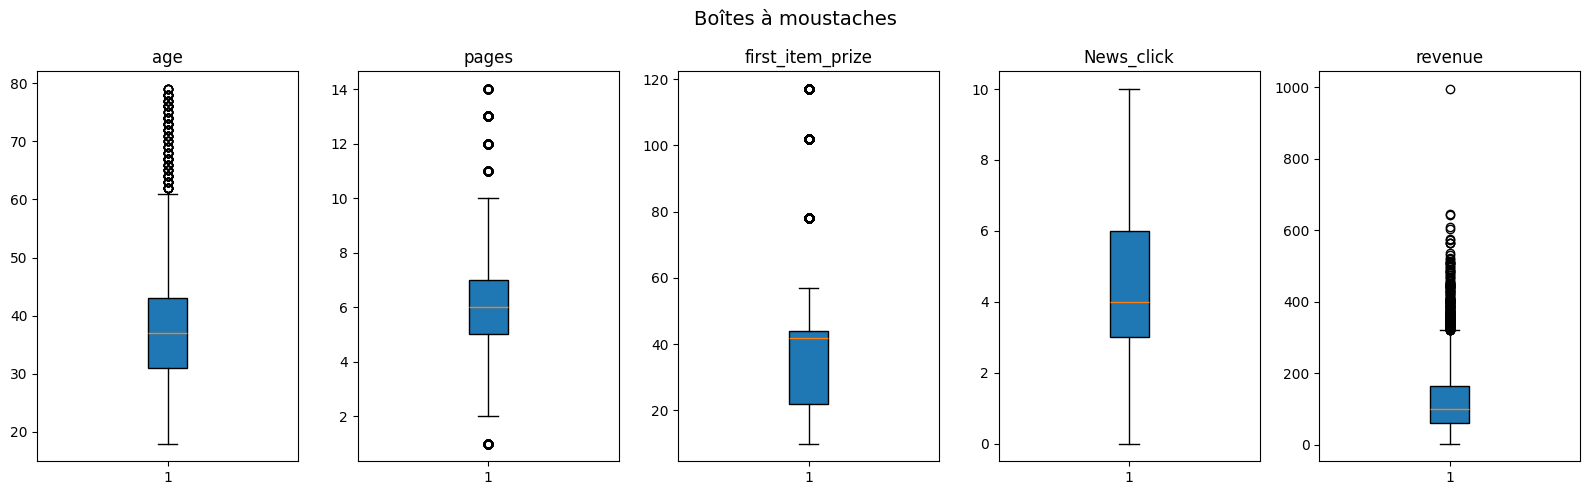

In [363]:
# Boîtes à moustaches
fig,axes=plt.subplots(1,5, figsize=(16,5))
fig.suptitle("Boîtes à moustaches", fontsize=14)
variable_num=train_set.drop(["gender","ReBuy","country"], axis=1)
for ax,col in zip(axes, variable_num.columns):
    bplot=ax.boxplot(variable_num[col].dropna(), patch_artist=True)
    bplot['boxes'][0]
    ax.set_title(col)

plt.tight_layout()
plt.show()

Référence utilisé: "https://matplotlib.org/stable/gallery/statistics/boxplot_color.html"

* On observe quelques clients ayant visité un nombre inhabituellement élevé de pages du site environ 13 à 14 pages.
* Les prix du premier article se concentrent surtout vers la tranche de 10 à 40. Hors, on observe des outliers élevés (environ 80 à 120).
* Il n'y a aucune donnée aberrante pour la variable `News_click`.
* Les revenus présentent des valeurs extrêmes (dans les environ de 1000).

In [ ]:
# Transformateur sur mesure permettant d'enlever les données aberrantes
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor=factor
    def outlier_detector(self, X, y=None):
        X= pd.Series(X).copy()
        q1= X.quantile(0.25)
        q3= X.quantile(0.75)
        iqr=q3 - q1
        self.lower_bound.append(q1 - (self.factor * iqr))
        self.upper_bound.append(q3 + (self.factor * iqr))

    def fit(self, X, y=None):
        self.lower_bound = []
        self.upper_bound = []
        X.apply(self.outlier_detector)
        return self

    def transform(self, X, y=None):
        X=pd.DataFrame(X).copy()
        for i in range(X.shape[1]):
            x = X.iloc[:,i].copy()
            x[ (x < self.lower_bound[i]) | (x > self.upper_bound[i])]= np.nan
            X.iloc[:,i]= x
        return X

outlier_remover = OutlierRemover()

Référence utilisé: "https://medium.com/data-science/creating-custom-transformers-using-scikit-learn-5f9db7d7fdb5"

### 3.3. Enrichissement des données

In [364]:

# a) nettoyage des deux datasets 
import re
class DataJoin(BaseEstimator, TransformerMixin):
    def __init__(self, PIB=True):
        self.PIB = PIB
    def fit(self, X,y=None):
        self.country_population_=pd.read_csv("CountryPopulation.csv")
        self.country_population_ = self.country_population_.rename(columns={'Country': 'country'})

        if self.PIB:
            self.country_gdp_=pd.read_csv("CountryGDP.csv")
            self.country_gdp_ = self.country_gdp_.rename(columns={'Country': 'country'})

        return self

    def transform(self, X, y=None):
        X_out=pd.DataFrame(X).copy()

       # b) Première jointure: Customer et CountryPopulation
        X_out=pd.merge(X_out, self.country_population_, on='country', how='left')

      # c) Si PIB=True, on ajoute les données de CountryGDP
        if self.PIB:
            X_out=pd.merge(X_out, self.country_gdp_, on= 'country', how='left')
        # d) Retourne le résultat de la jointure comme nouveau dataset fusionné
        return X_out 

DataJoin=DataJoin(PIB=True)

In [365]:
DataJoin.fit_transform(customer)

,age,pages,first_item_prize,gender,ReBuy,News_click,country,population,GDP_inhab
0,36.0,6.0,10.0,Masc,False,3.0,Ghana,24658823,3316
1,36.0,6.0,22.0,Masc,True,4.0,Bangladesh,152518015,1963
2,38.0,3.0,44.0,Fem,False,3.0,Russia,143700000,17518
3,36.0,4.0,15.5,Masc,False,10.0,Argentina,41660096,17917
4,40.0,4.0,15.5,Fem,False,7.0,Sudan,37964000,2549
...,...,...,...,...,...,...,...,...,...
7995,48.0,7.0,44.0,Masc,True,6.0,Tanzania,44928923,1627
7996,25.0,10.0,22.0,Fem,False,2.0,Colombia,47488000,10671
7997,34.0,3.0,28.0,Masc,False,6.0,Spain,46609700,30058
7998,65.0,7.0,10.0,Masc,False,8.0,Brazil,201032714,11747
